In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style("whitegrid")

In [6]:
df = pd.read_csv("/Users/jamesemcnally/Dropbox/DSBC Student Risk Factors Datasets/Streaming_OULAD_dataset.csv")

In [7]:
pd.set_option('display.max_columns', 50)
df.describe().round(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,score,final_result
count,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.00,1718983.0,1718983.00,1718983.00,1718983.00,1718983.00,115592.00,1718983.00
mean,3.27,1.73,729088.99,0.41,5.11,1.82,4.54,0.36,0.12,77.56,0.09,452.58,0.03,0.01,0.03,0.00,4.40,0.05,3.84,0.01,0.06,6.22,0.02,0.49,0.03,0.04,3.87,0.0,0.61,0.00,1.87,0.31,75.47,1.86
std,1.69,1.10,581038.69,0.49,3.59,0.74,2.81,0.50,0.41,37.13,0.29,230.44,0.61,0.21,0.38,0.07,9.79,0.93,7.71,0.11,0.53,15.66,0.47,4.18,0.31,0.45,21.26,0.0,7.36,0.01,5.07,1.02,18.24,0.82
min,0.00,0.00,6516.00,0.00,0.00,0.00,0.00,0.00,0.00,30.00,0.00,-18.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,1.00,504105.00,0.00,2.00,1.00,2.00,0.00,0.00,60.00,0.00,287.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,66.00,2.00
50%,3.00,2.00,587810.00,0.00,5.00,2.00,5.00,0.00,0.00,60.00,0.00,437.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,79.00,2.00
75%,5.00,3.00,645784.00,1.00,8.00,2.00,7.00,1.00,0.00,90.00,0.00,644.00,0.00,0.00,0.00,0.00,5.00,0.00,5.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.00,0.00,89.00,2.00
max,6.00,3.00,2698588.00,1.00,12.00,4.00,9.00,2.00,6.00,630.00,1.00,876.00,70.00,39.00,332.00,7.00,1224.00,170.00,6977.00,31.00,146.00,3733.00,118.00,581.00,44.00,25.00,2623.00,4.0,4956.00,5.00,3967.00,360.00,100.00,3.00


In [8]:
df.isna().sum()

code_module                   0
code_presentation             0
id_student                    0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
date                          0
dataplus                      0
dualpane                      0
externalquiz                  0
folder                        0
forumng                       0
glossary                      0
homepage                      0
htmlactivity                  0
oucollaborate                 0
oucontent                     0
ouelluminate                  0
ouwiki                        0
page                          0
questionnaire                 0
quiz                          0
repeatactivity                0
resource                      0
sharedsubpage                 0
subpage                       0
url     

In [9]:
summary = pd.DataFrame({
    'Zero Count': (df == 0).sum(),
    'Non-Zero Count': (df != 0).sum(),
    'Total Non-Null': df.count()
})
summary['% Zero'] = (summary['Zero Count'] / summary['Total Non-Null'] * 100).round(2)
summary['% Non-Zero'] = (summary['Non-Zero Count'] / summary['Total Non-Null'] * 100).round(2)
print(summary)

                      Zero Count  Non-Zero Count  Total Non-Null  % Zero  \
code_module                62531         1656452         1718983    3.64   
code_presentation         280841         1438142         1718983   16.34   
id_student                     0         1718983         1718983    0.00   
gender                   1021413          697570         1718983   59.42   
region                    186077         1532906         1718983   10.82   
highest_education          11810         1707173         1718983    0.69   
imd_band                  146487         1572496         1718983    8.52   
age_band                 1122808          596175         1718983   65.32   
num_of_prev_attempts     1548009          170974         1718983   90.05   
studied_credits                0         1718983         1718983    0.00   
disability               1564411          154572         1718983   91.01   
date                        1339         1717644         1718983    0.08   
dataplus    

In [10]:
# Create "week" column that corresponds to each week of the course, 
# starting from the first date of each code_presentation. 
# The first date of code_presentation 1 is 232 and 
# the first date of code_presentation 3 is 582

df['week'] = df.groupby('code_presentation')['date'].transform(
    lambda x: ((x - x.min()) // 7) + 1
)

df.describe()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,score,final_result,week
count,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,1.718983e+06,115592.000000,1.718983e+06,1.718983e+06
mean,3.273085e+00,1.730863e+00,7.290890e+05,4.058039e-01,5.106832e+00,1.816296e+00,4.539478e+00,3.580838e-01,1.232432e-01,7.755868e+01,8.992061e-02,4.525774e+02,2.614569e-02,1.139627e-02,3.478045e-02,3.215855e-03,4.402935e+00,4.857523e-02,3.844886e+00,5.071022e-03,5.848865e-02,6.222096e+00,2.098857e-02,4.898559e-01,3.474962e-02,3.553264e-02,3.868023e+00,5.235654e-06,6.131230e-01,9.773221e-05,1.874005e+00,3.118751e-01,75.472455,1.860982e+00,1.785938e+01
std,1.687322e+00,1.100942e+00,5.810387e+05,4.910471e-01,3.588133e+00,7.436687e-01,2.809392e+00,5.023850e-01,4.120682e-01,3.713343e+01,2.860681e-01,2.304353e+02,6.085906e-01,2.138181e-01,3.811683e-01,6.596622e-02,9.791707e+00,9.288416e-01,7.711400e+00,1.062147e-01,5.310814e-01,1.565807e+01,4.674698e-01,4.180075e+00,3.124487e-01,4.465688e-01,2.125865e+01,4.107362e-03,7.357730e+00,1.181558e-02,5.066726e+00,1.024145e+00,18.243023,8.154653e-01,1.077732e+01
min,0.000000e+00,0.000000e+00,6.516000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,-1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000e+00
25%,2.000000e+00,1.000000e+00,5.041050e+05,0.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,0.000000e+00,2.870000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,66.000000,2.000000e+00,8.000000e+00
50%,3.000000e+00,2.000000e+00,5.878100e+05,0.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,6.000000e+01,0.000000e+00,4.370000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.000000,2.000000e+00,1.700000e+01
75%,5.000000e+00,3.000000e+00,6.457840e+05,1.000000e+00,8.000000e+00,2.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,9.000000e+01,0.000000e+00,6.440000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,89.000000,2.000000e+00,2.600000e+01
max,6.000000e+00,3.000000e+00,2.698588e+06,1.000000e+00,1.200000e+01,4.000000e+00,9.000000e+00,2.000000e+00,6.000000e+00,6.300000e+02,1.000000e+00,8.760000e+02,7.000000e+01,3.900000e+01,3.320000e+02,7.000000e+00,1.224000e+03,1.700000e+02,6.977000e+03,3.100000e+01,1.460000e+02,3.733000e+03,1.180000e+02,5.810000e+02,4.400000e+01,2.500000e+01,2.623000e+03,4.000000e+00,4.956000e+03,5.000000e+00,3.967000e+03,3.600000e+02,100.000000,3.0000

In [11]:
# Calculate total coeffient of variation for each student over the course of the module
# NB: this is overall, not week by week

def calculate_regularity_cv(df, student_id_col='id_student', date_col='date'):
    def cv_gaps(x):
        gaps = x.sort_values().diff().dropna()
        if len(gaps) == 0 or gaps.mean() == 0:
            return np.nan
        return gaps.std() / gaps.mean()
    
    cv_scores = df.groupby(student_id_col)[date_col].apply(cv_gaps)
    df['cv_regularity_overall'] = df[student_id_col].map(cv_scores)
    return df

# Lower CV = more regular
# Higher CV = more variable/intermittent
df = calculate_regularity_cv(df)

In [12]:
# Calculate total standard deviation of gaps for each student over the course of the module
# NB: this is overall, not week by week

def calculate_regularity_std(df, student_id_col='id_student', date_col='date'):
    regularity = df.groupby(student_id_col)[date_col].apply(
        lambda x: x.sort_values().diff().std()
    )
    # Add as a new column to the dataframe
    df['std_regularity_overall'] = df[student_id_col].map(regularity)
    return df

# Lower values = more regular logins
# Higher values = more intermittent/irregular
df = calculate_regularity_std(df)

In [13]:
# Calculate how many days/week each student logs in over the course of the module
# Metric is "Active days per week"
# NB: this is overall, not week by week

def weekly_consistency(df, student_id_col='id_student', date_col='date', week_col='week'):
    """
    Calculate how consistently they log in each week.
    Adds 'active_days_per_week_overall' column to dataframe.
    """
    # Count unique days per week
    weekly_days = df.groupby([student_id_col, week_col])[date_col].nunique()
    
    # Calculate std of days per week (lower = more consistent)
    consistency = weekly_days.groupby(student_id_col).std()
    
    # Add as a new column to the dataframe
    df['active_days_per_week_overall'] = df[student_id_col].map(consistency)
    
    return df

# Lower values = more consistent weekly activity
# Higher values = more variable weekly activity
df = weekly_consistency(df)


In [14]:
df.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,score,final_result,week,cv_regularity_overall,std_regularity_overall,active_days_per_week_overall
0,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,237,0,0,0,0,2,0,7,0,0,78,0,0,0,0,0,0,0,0,11,0,NaN,2.0,3,0.870173,5.756531,0.859338
1,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,242,0,0,0,0,15,0,10,0,0,21,0,0,0,0,0,0,3,0,0,0,NaN,2.0,4,0.870173,5.756531,0.859338
2,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,243,0,0,0,0,3,0,9,0,0,102,0,0,0,0,0,0,4,0,8,1,NaN,2.0,4,0.870173,5.756531,0.859338
3,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,244,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,2.0,4,0.870173,5.756531,0.859338
4,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,248,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,NaN,2.0,5,0.870173,5.756531,0.859338


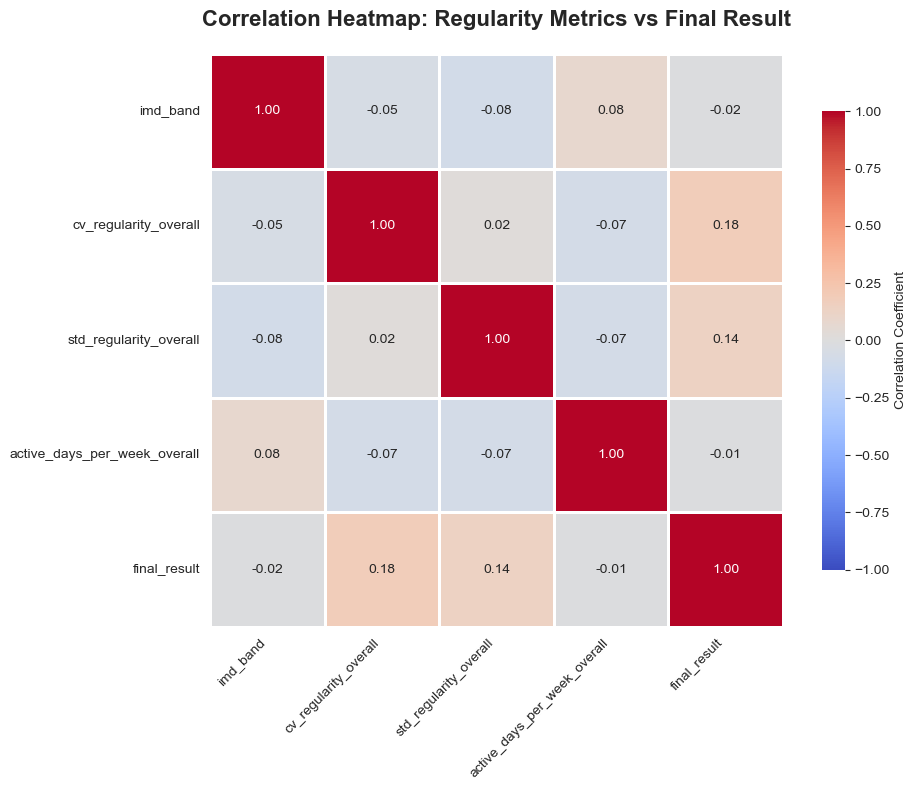

In [15]:
# Create a correlation heatmap between the three *overall* regularity metrics, plus
# imd_band (a measure of social deprivation), plus final_result

# I may have calculated this wrong

np.random.seed(42)
df_heatmap = pd.DataFrame({
    'imd_band': np.random.choice(range(0, 10), 100),
    'cv_regularity_overall': np.random.uniform(0, 2, 100),
    'std_regularity_overall': np.random.uniform(0, 10, 100),
    'active_days_per_week_overall': np.random.uniform(0, 3, 100),
    'final_result': np.random.choice([0, 1, 2, 3], 100)  # 0=Withdraw, 1=Fail, 2=Pass, 3=Distinction
})

# Select variables for correlation
variables = ['imd_band', 'cv_regularity_overall', 'std_regularity_overall', 
             'active_days_per_week_overall', 'final_result']

# Calculate correlation matrix
correlation_matrix = df_heatmap[variables].corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True,           # Show numbers
            cmap='coolwarm',      # Red-blue color scheme
            center=0,             # Center at 0
            square=True,          # Square cells
            linewidths=2,         # Cell borders
            linecolor='white',    # Border color
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
            fmt='.2f',            # 2 decimal places
            vmin=-1, vmax=1)      # Scale from -1 to 1

plt.title('Correlation Heatmap: Regularity Metrics vs Final Result', 
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Below I generate weekly metrics:

In [16]:
# A) Weekly Coefficient of Variation of gaps
def calculate_regularity_cv_weekly(df, student_id_col='id_student', date_col='date', week_col='week'):
    """
    Calculate coefficient of variation of time gaps within each week for each student.
    Adds 'cv_regularity_weekly' column to dataframe.
    """
    def cv_gaps(x):
        gaps = x.sort_values().diff().dropna()
        if len(gaps) == 0 or gaps.mean() == 0:
            return np.nan
        return gaps.std() / gaps.mean()
    
    # Calculate CV for each student-week combination
    cv_scores = df.groupby([student_id_col, week_col])[date_col].apply(cv_gaps).reset_index()
    cv_scores.columns = [student_id_col, week_col, 'cv_regularity_weekly']
    
    # Merge back to original dataframe
    df = df.merge(cv_scores, on=[student_id_col, week_col], how='left')
    
    return df

# Lower CV = more regular within that week
# Higher CV = more variable/intermittent within that week
df = calculate_regularity_cv_weekly(df)


# B) Weekly Standard Deviation of gaps
def calculate_regularity_std_weekly(df, student_id_col='id_student', date_col='date', week_col='week'):
    """
    Calculate standard deviation of time gaps within each week for each student.
    Adds 'std_regularity_weekly' column to dataframe.
    """
    def std_gaps(x):
        gaps = x.sort_values().diff()
        return gaps.std()
    
    # Calculate STD for each student-week combination
    std_scores = df.groupby([student_id_col, week_col])[date_col].apply(std_gaps).reset_index()
    std_scores.columns = [student_id_col, week_col, 'std_regularity_weekly']
    
    # Merge back to original dataframe
    df = df.merge(std_scores, on=[student_id_col, week_col], how='left')
    
    return df

# Lower values = more regular logins within that week
# Higher values = more intermittent/irregular within that week
df = calculate_regularity_std_weekly(df)


# C) Active days per week (count)
def calculate_active_days_weekly(df, student_id_col='id_student', date_col='date', week_col='week'):
    """
    Calculate how many unique days each student was active in each week.
    Adds 'active_days_weekly' column to dataframe.
    """
    # Count unique days for each student-week combination
    active_days = df.groupby([student_id_col, week_col])[date_col].nunique().reset_index()
    active_days.columns = [student_id_col, week_col, 'active_days_weekly']
    
    # Merge back to original dataframe
    df = df.merge(active_days, on=[student_id_col, week_col], how='left')
    
    return df

In [17]:
# Higher values = more active days in that week (0-7)
# Lower values = fewer active days in that week
df = calculate_active_days_weekly(df)

In [18]:
df.head(20)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,date,dataplus,dualpane,externalquiz,folder,forumng,glossary,homepage,htmlactivity,oucollaborate,oucontent,ouelluminate,ouwiki,page,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,score,final_result,week,cv_regularity_overall,std_regularity_overall,active_days_per_week_overall,cv_regularity_weekly,std_regularity_weekly,active_days_weekly
0,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,237,0,0,0,0,2,0,7,0,0,78,0,0,0,0,0,0,0,0,11,0,NaN,2.0,3,0.870173,5.756531,0.859338,NaN,NaN,1
1,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,242,0,0,0,0,15,0,10,0,0,21,0,0,0,0,0,0,3,0,0,0,NaN,2.0,4,0.870173,5.756531,0.859338,0.0,0.0,3
2,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,243,0,0,0,0,3,0,9,0,0,102,0,0,0,0,0,0,4,0,8,1,NaN,2.0,4,0.870173,5.756531,0.859338,0.0,0.0,3
3,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,244,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,NaN,2.0,4,0.870173,5.756531,0.859338,0.0,0.0,3
4,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,248,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,NaN,2.0,5,0.870173,5.756531,0.859338,NaN,NaN,2
5,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,251,0,0,0,0,0,0,1,0,0,18,0,0,0,0,0,0,0,0,1,0,NaN,2.0,5,0.870173,5.756531,0.859338,NaN,NaN,2
6,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,259,0,0,0,0,0,0,3,0,0,48,0,0,0,0,0,0,0,0,0,0,NaN,2.0,6,0.870173,5.756531,0.859338,NaN,NaN,2
7,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,260,0,0,0,0,35,0,8,0,0,4,0,0,0,0,0,0,1,0,1,0,78.0,2.0,6,0.870173,5.756531,0.859338,NaN,NaN,2
8,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,271,0,0,0,0,0,0,5,0,0,12,0,0,0,0,0,0,0,0,1,0,NaN,2.0,8,0.870173,5.756531,0.859338,0.0,0.0,3
9,0.0,1.0,11391,0.0,0.0,3.0,9.0,2.0,0,240,0.0,272,0,0,0,0,2,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,2.0,8,0.870173,5.756531,0.859338,0.0,0.0,3


Now I'm looking at what kind of relationship exists between the various *weekly* regularity metrics and final_result, starting with value_counts.

In [19]:
# Calculate mean active days for each final result category
print(df.groupby('final_result')['active_days_weekly'].describe())

# Or just means
print(df.groupby('final_result')['active_days_weekly'].mean())

# Point-biserial correlation (if you want a numeric measure)
# This treats final_result as ordinal (0 < 1 < 2 < 3)
from scipy.stats import spearmanr
correlation, p_value = spearmanr(df['final_result'], df['active_days_weekly'], nan_policy='omit')
print(f"Spearman correlation: {correlation:.3f}, p-value: {p_value:.4f}")

                  count      mean       std  min  25%  50%  75%   max
final_result                                                         
0.0            160031.0  4.283164  2.599167  1.0  2.0  4.0  6.0  19.0
1.0            227550.0  3.661134  2.104301  1.0  2.0  3.0  5.0  17.0
2.0           1022760.0  4.347192  2.235218  1.0  3.0  4.0  6.0  19.0
3.0            308642.0  4.944285  2.376706  1.0  3.0  5.0  6.0  16.0
final_result
0.0    4.283164
1.0    3.661134
2.0    4.347192
3.0    4.944285
Name: active_days_weekly, dtype: float64
Spearman correlation: 0.147, p-value: 0.0000


In [20]:
df["active_days_weekly"].isna().sum()

np.int64(0)

In [21]:
# Check for nulls first
print("=== Data Quality Check ===")
print(f"\nactive_days_weekly:")
print(f"  Total values: {len(df)}")
print(f"  Null values: {df['active_days_weekly'].isna().sum()} ({df['active_days_weekly'].isna().sum()/len(df)*100:.1f}%)")
print(f"  Zero values: {(df['active_days_weekly'] == 0).sum()} ({(df['active_days_weekly'] == 0).sum()/len(df)*100:.1f}%)")
print(f"  Valid values: {df['active_days_weekly'].notna().sum()}")
print(f"  Min: {df['active_days_weekly'].min()}, Max: {df['active_days_weekly'].max()}")

# Remove rows with nulls for clean analysis
df_clean = df[['active_days_weekly', 'final_result']].dropna()

print(f"\n=== Analysis on clean data ===")
print(f"Original rows: {len(df)}")
print(f"Clean rows (no nulls): {len(df_clean)}")
print(f"Percentage retained: {len(df_clean)/len(df)*100:.1f}%")

print(f"\nSample sizes per group:")
print(df_clean['final_result'].value_counts().sort_index())

=== Data Quality Check ===

active_days_weekly:
  Total values: 1718983
  Null values: 0 (0.0%)
  Zero values: 0 (0.0%)
  Valid values: 1718983
  Min: 1, Max: 19

=== Analysis on clean data ===
Original rows: 1718983
Clean rows (no nulls): 1718983
Percentage retained: 100.0%

Sample sizes per group:
final_result
0.0     160031
1.0     227550
2.0    1022760
3.0     308642
Name: count, dtype: int64


In [24]:
from scipy import stats
from itertools import combinations

# 1. Kruskal-Wallis Test
print("\n" + "="*60)
print("KRUSKAL-WALLIS TEST (Are groups different?)")
print("="*60)

groups = [df_clean[df_clean['final_result'] == i]['active_days_weekly'].values 
          for i in sorted(df_clean['final_result'].unique())]

h_stat, p_value = stats.kruskal(*groups)
print(f"\nactive_days_weekly:")
print(f"  H-statistic: {h_stat:.4f}")
print(f"  p-value: {p_value:.6f}")
print(f"  Result: {'*** SIGNIFICANT DIFFERENCE between groups ***' if p_value < 0.05 else 'No significant difference between groups'}")



KRUSKAL-WALLIS TEST (Are groups different?)

active_days_weekly:
  H-statistic: 45640.6134
  p-value: 0.000000
  Result: *** SIGNIFICANT DIFFERENCE between groups ***


In [25]:
# 2. Effect Size
print("\n" + "="*60)
print("EFFECT SIZE")
print("="*60)

n = len(df_clean)
k = len(df_clean['final_result'].unique())
epsilon_sq = (h_stat - k + 1) / (n - k)

print(f"\nactive_days_weekly epsilon-squared: {epsilon_sq:.4f}")
print(f"  Interpretation: {'Small' if epsilon_sq < 0.04 else 'Medium' if epsilon_sq < 0.16 else 'Large'} effect")



EFFECT SIZE

active_days_weekly epsilon-squared: 0.0265
  Interpretation: Small effect


In [26]:
# 3. Descriptive statistics
print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS BY GROUP")
print("="*60)

print("\nactive_days_weekly by final_result:")
desc = df_clean.groupby('final_result')['active_days_weekly'].agg([
    ('n', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max'),
    ('zeros', lambda x: (x == 0).sum())
])
print(desc)

# Distribution of values within each group
print("\n=== Distribution of active_days_weekly by final_result ===")
for result in sorted(df_clean['final_result'].unique()):
    print(f"\nFinal Result = {result}:")
    print(df_clean[df_clean['final_result'] == result]['active_days_weekly'].value_counts().sort_index())



DESCRIPTIVE STATISTICS BY GROUP

active_days_weekly by final_result:
                    n      mean  median       std  min  max  zeros
final_result                                                      
0.0            160031  4.283164     4.0  2.599167    1   19      0
1.0            227550  3.661134     3.0  2.104301    1   17      0
2.0           1022760  4.347192     4.0  2.235218    1   19      0
3.0            308642  4.944285     5.0  2.376706    1   16      0

=== Distribution of active_days_weekly by final_result ===

Final Result = 0.0:
active_days_weekly
1     19521
2     24946
3     26146
4     24548
5     20947
6     16491
7     13586
8      3637
9      2812
10     2338
11     1774
12     1280
13      912
14      737
15      167
16       65
17       36
18       48
19       40
Name: count, dtype: int64

Final Result = 1.0:
active_days_weekly
1     35774
2     42763
3     41202
4     35888
5     28194
6     21018
7     15846
8      2195
9      1665
10     1112
11      728
12

In [27]:
# 4. Post-hoc pairwise Mann-Whitney U tests
def pairwise_mannwhitneyu(df, value_col, group_col):
    """Perform pairwise Mann-Whitney U tests with Bonferroni correction"""
    groups = sorted(df[group_col].unique())
    n_comparisons = len(list(combinations(groups, 2)))
    bonferroni_alpha = 0.05 / n_comparisons
    
    results = []
    for g1, g2 in combinations(groups, 2):
        data1 = df[df[group_col] == g1][value_col].values
        data2 = df[df[group_col] == g2][value_col].values
        
        u_stat, p_val = stats.mannwhitneyu(data1, data2, alternative='two-sided')
        
        mean1 = np.mean(data1)
        mean2 = np.mean(data2)
        median1 = np.median(data1)
        median2 = np.median(data2)
        
        results.append({
            'Group 1': g1,
            'Group 2': g2,
            'U-statistic': u_stat,
            'p-value': p_val,
            'p-value (Bonf)': p_val * n_comparisons,
            'Significant': 'Yes' if p_val < bonferroni_alpha else 'No',
            'Mean 1': mean1,
            'Mean 2': mean2,
            'Median 1': median1,
            'Median 2': median2
        })
    
    return pd.DataFrame(results)

if p_value < 0.05:
    print("\n" + "="*60)
    print("POST-HOC: Pairwise Mann-Whitney U tests for active_days_weekly")
    print("="*60)
    posthoc = pairwise_mannwhitneyu(df_clean, 'active_days_weekly', 'final_result')
    print(f"\nBonferroni-corrected significance level: {0.05/len(posthoc):.4f}")
    print("\n", posthoc.to_string(index=False))
    
    significant = posthoc[posthoc['Significant'] == 'Yes']
    if len(significant) > 0:
        print("\n*** Significant pairs after Bonferroni correction: ***")
        for _, row in significant.iterrows():
            print(f"  {row['Group 1']} vs {row['Group 2']}: p={row['p-value']:.4f}, means: {row['Mean 1']:.3f} vs {row['Mean 2']:.3f}")
    else:
        print("\nNo significant pairwise differences after Bonferroni correction")
else:
    print("\n(Skipping post-hoc tests since Kruskal-Wallis was not significant)")



POST-HOC: Pairwise Mann-Whitney U tests for active_days_weekly

Bonferroni-corrected significance level: 0.0083

  Group 1  Group 2  U-statistic       p-value  p-value (Bonf) Significant   Mean 1   Mean 2  Median 1  Median 2
     0.0      1.0 2.050614e+10  0.000000e+00    0.000000e+00         Yes 4.283164 3.661134       4.0       3.0
     0.0      2.0 7.760846e+10 1.223898e-247   7.343390e-247         Yes 4.283164 4.347192       4.0       4.0
     0.0      3.0 1.996533e+10  0.000000e+00    0.000000e+00         Yes 4.283164 4.944285       4.0       5.0
     1.0      2.0 9.468790e+10  0.000000e+00    0.000000e+00         Yes 3.661134 4.347192       3.0       4.0
     1.0      3.0 2.361020e+10  0.000000e+00    0.000000e+00         Yes 3.661134 4.944285       3.0       5.0
     2.0      3.0 1.339487e+11  0.000000e+00    0.000000e+00         Yes 4.347192 4.944285       4.0       5.0

*** Significant pairs after Bonferroni correction: ***
  0.0 vs 1.0: p=0.0000, means: 4.283 vs 3.661
  0.0 

In [28]:
# 5. Activity level distribution
print("\n" + "="*60)
print("ACTIVITY LEVEL DISTRIBUTION")
print("="*60)

for result in sorted(df_clean['final_result'].unique()):
    subset = df_clean[df_clean['final_result'] == result]
    print(f"\nFinal Result = {result} (n={len(subset)}):")
    for days in range(8):  # 0-7 days
        count = (subset['active_days_weekly'] == days).sum()
        pct = count / len(subset) * 100
        print(f"  {days} days/week: {count:5d} ({pct:5.1f}%)")


ACTIVITY LEVEL DISTRIBUTION

Final Result = 0.0 (n=160031):
  0 days/week:     0 (  0.0%)
  1 days/week: 19521 ( 12.2%)
  2 days/week: 24946 ( 15.6%)
  3 days/week: 26146 ( 16.3%)
  4 days/week: 24548 ( 15.3%)
  5 days/week: 20947 ( 13.1%)
  6 days/week: 16491 ( 10.3%)
  7 days/week: 13586 (  8.5%)

Final Result = 1.0 (n=227550):
  0 days/week:     0 (  0.0%)
  1 days/week: 35774 ( 15.7%)
  2 days/week: 42763 ( 18.8%)
  3 days/week: 41202 ( 18.1%)
  4 days/week: 35888 ( 15.8%)
  5 days/week: 28194 ( 12.4%)
  6 days/week: 21018 (  9.2%)
  7 days/week: 15846 (  7.0%)

Final Result = 2.0 (n=1022760):
  0 days/week:     0 (  0.0%)
  1 days/week: 91368 (  8.9%)
  2 days/week: 140789 ( 13.8%)
  3 days/week: 163801 ( 16.0%)
  4 days/week: 168008 ( 16.4%)
  5 days/week: 156360 ( 15.3%)
  6 days/week: 132369 ( 12.9%)
  7 days/week: 123793 ( 12.1%)

Final Result = 3.0 (n=308642):
  0 days/week:     0 (  0.0%)
  1 days/week: 17925 (  5.8%)
  2 days/week: 31168 ( 10.1%)
  3 days/week: 39721 ( 12.

Now looking at cv_regularity_weekly and std_regularity_weekly. These are more difficult because they have many zero and null values.

In [29]:
from scipy import stats
from itertools import combinations

# Check for nulls and zeros
print("=== Data Quality Check ===")
print(f"\ncv_regularity_weekly:")
print(f"  Total values: {len(df)}")
print(f"  Null values: {df['cv_regularity_weekly'].isna().sum()} ({df['cv_regularity_weekly'].isna().sum()/len(df)*100:.1f}%)")
print(f"  Zero values: {(df['cv_regularity_weekly'] == 0).sum()} ({(df['cv_regularity_weekly'] == 0).sum()/len(df)*100:.1f}%)")
print(f"  Valid values: {df['cv_regularity_weekly'].notna().sum()}")

print(f"\nstd_regularity_weekly:")
print(f"  Total values: {len(df)}")
print(f"  Null values: {df['std_regularity_weekly'].isna().sum()} ({df['std_regularity_weekly'].isna().sum()/len(df)*100:.1f}%)")
print(f"  Zero values: {(df['std_regularity_weekly'] == 0).sum()} ({(df['std_regularity_weekly'] == 0).sum()/len(df)*100:.1f}%)")
print(f"  Valid values: {df['std_regularity_weekly'].notna().sum()}")

# Distribution by final_result
print("\n=== Distribution by final_result ===")
print(df.groupby('final_result')[['cv_regularity_weekly', 'std_regularity_weekly']].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('null_count', lambda x: x.isna().sum())
]))

=== Data Quality Check ===

cv_regularity_weekly:
  Total values: 1718983
  Null values: 397686 (23.1%)
  Zero values: 364675 (21.2%)
  Valid values: 1321297

std_regularity_weekly:
  Total values: 1718983
  Null values: 397389 (23.1%)
  Zero values: 364972 (21.2%)
  Valid values: 1321594

=== Distribution by final_result ===
             cv_regularity_weekly                                           \
                            count      mean    median       std null_count   
final_result                                                                 
0.0                        116711  0.942450  0.500000  0.938848      43320   
1.0                        150440  0.661603  0.440959  0.715189      77110   
2.0                        794007  0.624392  0.400000  0.744649     228753   
3.0                        260139  0.656554  0.384900  0.835211      48503   

             std_regularity_weekly                                             
                             count       mean

Here I'm dropping the nulls. [NB: I am NOT sure about this. It may instead be better to convert nulls to zeros.]

In [30]:
# Remove rows with nulls for clean analysis
df_clean = df[['cv_regularity_weekly', 'std_regularity_weekly', 'final_result']].dropna()

print(f"\n=== Analysis on clean data ===")
print(f"Original rows: {len(df)}")
print(f"Clean rows (no nulls): {len(df_clean)}")
print(f"Percentage retained: {len(df_clean)/len(df)*100:.1f}%")

print(f"\nSample sizes per group:")
print(df_clean['final_result'].value_counts().sort_index())



=== Analysis on clean data ===
Original rows: 1718983
Clean rows (no nulls): 1321297
Percentage retained: 76.9%

Sample sizes per group:
final_result
0.0    116711
1.0    150440
2.0    794007
3.0    260139
Name: count, dtype: int64


In [31]:
# 1. Kruskal-Wallis Test
print("\n" + "="*60)
print("KRUSKAL-WALLIS TEST (Are groups different?)")
print("="*60)

groups_cv = [df_clean[df_clean['final_result'] == i]['cv_regularity_weekly'].values 
             for i in sorted(df_clean['final_result'].unique())]
groups_std = [df_clean[df_clean['final_result'] == i]['std_regularity_weekly'].values 
              for i in sorted(df_clean['final_result'].unique())]

h_cv, p_kw_cv = stats.kruskal(*groups_cv)
print(f"\ncv_regularity_weekly:")
print(f"  H-statistic: {h_cv:.4f}")
print(f"  p-value: {p_kw_cv:.6f}")
print(f"  Result: {'*** SIGNIFICANT DIFFERENCE between groups ***' if p_kw_cv < 0.05 else 'No significant difference between groups'}")

h_std, p_kw_std = stats.kruskal(*groups_std)
print(f"\nstd_regularity_weekly:")
print(f"  H-statistic: {h_std:.4f}")
print(f"  p-value: {p_kw_std:.6f}")
print(f"  Result: {'*** SIGNIFICANT DIFFERENCE between groups ***' if p_kw_std < 0.05 else 'No significant difference between groups'}")


KRUSKAL-WALLIS TEST (Are groups different?)



cv_regularity_weekly:
  H-statistic: 13425.2188
  p-value: 0.000000
  Result: *** SIGNIFICANT DIFFERENCE between groups ***

std_regularity_weekly:
  H-statistic: 15665.8013
  p-value: 0.000000
  Result: *** SIGNIFICANT DIFFERENCE between groups ***


In [32]:
# 2. Effect Size
print("\n" + "="*60)
print("EFFECT SIZE")
print("="*60)

n = len(df_clean)
k = len(df_clean['final_result'].unique())
epsilon_sq_cv = (h_cv - k + 1) / (n - k)
epsilon_sq_std = (h_std - k + 1) / (n - k)

print(f"\ncv_regularity_weekly epsilon-squared: {epsilon_sq_cv:.4f}")
print(f"  Interpretation: {'Small' if epsilon_sq_cv < 0.04 else 'Medium' if epsilon_sq_cv < 0.16 else 'Large'} effect")

print(f"\nstd_regularity_weekly epsilon-squared: {epsilon_sq_std:.4f}")
print(f"  Interpretation: {'Small' if epsilon_sq_std < 0.04 else 'Medium' if epsilon_sq_std < 0.16 else 'Large'} effect")



EFFECT SIZE

cv_regularity_weekly epsilon-squared: 0.0102
  Interpretation: Small effect

std_regularity_weekly epsilon-squared: 0.0119
  Interpretation: Small effect


In [33]:
# 3. Descriptive statistics
print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS BY GROUP")
print("="*60)

print("\ncv_regularity_weekly by final_result:")
desc_cv = df_clean.groupby('final_result')['cv_regularity_weekly'].agg([
    ('n', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
])
print(desc_cv)

print("\nstd_regularity_weekly by final_result:")
desc_std = df_clean.groupby('final_result')['std_regularity_weekly'].agg([
    ('n', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max')
])
print(desc_std)


DESCRIPTIVE STATISTICS BY GROUP

cv_regularity_weekly by final_result:
                   n      mean    median       std  min       max
final_result                                                     
0.0           116711  0.942450  0.500000  0.938848  0.0  4.491415
1.0           150440  0.661603  0.440959  0.715189  0.0  3.981788
2.0           794007  0.624392  0.400000  0.744649  0.0  4.491415
3.0           260139  0.656554  0.384900  0.835211  0.0  4.319125

std_regularity_weekly by final_result:
                   n       mean    median        std  min         max
final_result                                                         
0.0           116711  32.910087  1.000000  60.621832  0.0  426.385389
1.0           150440  18.183970  0.687552  51.884922  0.0  428.506709
2.0           794007  13.798305  0.577350  41.233532  0.0  428.506709
3.0           260139  13.474098  0.522233  37.271302  0.0  424.264069


In [34]:
# 4. Post-hoc pairwise Mann-Whitney U tests (if Kruskal-Wallis is significant)
def pairwise_mannwhitneyu(df, value_col, group_col):
    """Perform pairwise Mann-Whitney U tests with Bonferroni correction"""
    groups = sorted(df[group_col].unique())
    n_comparisons = len(list(combinations(groups, 2)))
    bonferroni_alpha = 0.05 / n_comparisons
    
    results = []
    for g1, g2 in combinations(groups, 2):
        data1 = df[df[group_col] == g1][value_col].values
        data2 = df[df[group_col] == g2][value_col].values
        
        u_stat, p_val = stats.mannwhitneyu(data1, data2, alternative='two-sided')
        
        mean1 = np.mean(data1)
        mean2 = np.mean(data2)
        median1 = np.median(data1)
        median2 = np.median(data2)
        
        results.append({
            'Group 1': g1,
            'Group 2': g2,
            'U-statistic': u_stat,
            'p-value': p_val,
            'p-value (Bonf)': p_val * n_comparisons,  # Bonferroni correction
            'Significant': 'Yes' if p_val < bonferroni_alpha else 'No',
            'Mean 1': mean1,
            'Mean 2': mean2,
            'Median 1': median1,
            'Median 2': median2
        })
    
    return pd.DataFrame(results)

if p_kw_cv < 0.05:
    print("\n" + "="*60)
    print("POST-HOC: Pairwise Mann-Whitney U tests for cv_regularity_weekly")
    print("="*60)
    posthoc_cv = pairwise_mannwhitneyu(df_clean, 'cv_regularity_weekly', 'final_result')
    print(f"\nBonferroni-corrected significance level: {0.05/len(posthoc_cv):.4f}")
    print("\n", posthoc_cv.to_string(index=False))
    
    significant = posthoc_cv[posthoc_cv['Significant'] == 'Yes']
    if len(significant) > 0:
        print("\n*** Significant pairs after Bonferroni correction: ***")
        for _, row in significant.iterrows():
            print(f"  {row['Group 1']} vs {row['Group 2']}: p={row['p-value']:.4f}, means: {row['Mean 1']:.3f} vs {row['Mean 2']:.3f}")
    else:
        print("\nNo significant pairwise differences after Bonferroni correction")

if p_kw_std < 0.05:
    print("\n" + "="*60)
    print("POST-HOC: Pairwise Mann-Whitney U tests for std_regularity_weekly")
    print("="*60)
    posthoc_std = pairwise_mannwhitneyu(df_clean, 'std_regularity_weekly', 'final_result')
    print(f"\nBonferroni-corrected significance level: {0.05/len(posthoc_std):.4f}")
    print("\n", posthoc_std.to_string(index=False))
    
    significant = posthoc_std[posthoc_std['Significant'] == 'Yes']
    if len(significant) > 0:
        print("\n*** Significant pairs after Bonferroni correction: ***")
        for _, row in significant.iterrows():
            print(f"  {row['Group 1']} vs {row['Group 2']}: p={row['p-value']:.4f}, means: {row['Mean 1']:.3f} vs {row['Mean 2']:.3f}")
    else:
        print("\nNo significant pairwise differences after Bonferroni correction")


POST-HOC: Pairwise Mann-Whitney U tests for cv_regularity_weekly

Bonferroni-corrected significance level: 0.0083

  Group 1  Group 2  U-statistic      p-value  p-value (Bonf) Significant   Mean 1   Mean 2  Median 1  Median 2
     0.0      1.0 1.003301e+10 0.000000e+00    0.000000e+00         Yes 0.942450 0.661603  0.500000  0.440959
     0.0      2.0 5.526426e+10 0.000000e+00    0.000000e+00         Yes 0.942450 0.624392  0.500000  0.400000
     0.0      3.0 1.821570e+10 0.000000e+00    0.000000e+00         Yes 0.942450 0.656554  0.500000  0.384900
     1.0      2.0 6.344371e+10 0.000000e+00    0.000000e+00         Yes 0.661603 0.624392  0.440959  0.400000
     1.0      3.0 2.109157e+10 0.000000e+00    0.000000e+00         Yes 0.661603 0.656554  0.440959  0.384900
     2.0      3.0 1.052332e+11 5.239353e-49    3.143612e-48         Yes 0.624392 0.656554  0.400000  0.384900

*** Significant pairs after Bonferroni correction: ***
  0.0 vs 1.0: p=0.0000, means: 0.942 vs 0.662
  0.0 vs 2.

Here are the above analyses with the nulls converted to zeros:

In [35]:
# Convert nulls to zeros (treating as "no variation" or "perfectly regular")
df_analysis = df[['cv_regularity_weekly', 'std_regularity_weekly', 'final_result']].copy()
df_analysis['cv_regularity_weekly'] = df_analysis['cv_regularity_weekly'].fillna(0)
df_analysis['std_regularity_weekly'] = df_analysis['std_regularity_weekly'].fillna(0)

print(f"\n=== Analysis with nulls converted to zeros ===")
print(f"Total rows: {len(df_analysis)}")
print(f"Rows with cv_regularity_weekly = 0: {(df_analysis['cv_regularity_weekly'] == 0).sum()} ({(df_analysis['cv_regularity_weekly'] == 0).sum()/len(df_analysis)*100:.1f}%)")
print(f"Rows with std_regularity_weekly = 0: {(df_analysis['std_regularity_weekly'] == 0).sum()} ({(df_analysis['std_regularity_weekly'] == 0).sum()/len(df_analysis)*100:.1f}%)")

print(f"\nSample sizes per group:")
print(df_analysis['final_result'].value_counts().sort_index())


=== Analysis with nulls converted to zeros ===
Total rows: 1718983
Rows with cv_regularity_weekly = 0: 762361 (44.3%)
Rows with std_regularity_weekly = 0: 762361 (44.3%)

Sample sizes per group:
final_result
0.0     160031
1.0     227550
2.0    1022760
3.0     308642
Name: count, dtype: int64


In [36]:
# 1. Kruskal-Wallis Test
print("\n" + "="*60)
print("KRUSKAL-WALLIS TEST (Are groups different?)")
print("="*60)

groups_cv = [df_analysis[df_analysis['final_result'] == i]['cv_regularity_weekly'].values 
             for i in sorted(df_analysis['final_result'].unique())]
groups_std = [df_analysis[df_analysis['final_result'] == i]['std_regularity_weekly'].values 
              for i in sorted(df_analysis['final_result'].unique())]

h_cv, p_kw_cv = stats.kruskal(*groups_cv)
print(f"\ncv_regularity_weekly:")
print(f"  H-statistic: {h_cv:.4f}")
print(f"  p-value: {p_kw_cv:.6f}")
print(f"  Result: {'*** SIGNIFICANT DIFFERENCE between groups ***' if p_kw_cv < 0.05 else 'No significant difference between groups'}")

h_std, p_kw_std = stats.kruskal(*groups_std)
print(f"\nstd_regularity_weekly:")
print(f"  H-statistic: {h_std:.4f}")
print(f"  p-value: {p_kw_std:.6f}")
print(f"  Result: {'*** SIGNIFICANT DIFFERENCE between groups ***' if p_kw_std < 0.05 else 'No significant difference between groups'}")



KRUSKAL-WALLIS TEST (Are groups different?)

cv_regularity_weekly:
  H-statistic: 6064.0901
  p-value: 0.000000
  Result: *** SIGNIFICANT DIFFERENCE between groups ***

std_regularity_weekly:
  H-statistic: 5300.2497
  p-value: 0.000000
  Result: *** SIGNIFICANT DIFFERENCE between groups ***


In [37]:
# 2. Effect Size
print("\n" + "="*60)
print("EFFECT SIZE")
print("="*60)

n = len(df_analysis)
k = len(df_analysis['final_result'].unique())
epsilon_sq_cv = (h_cv - k + 1) / (n - k)
epsilon_sq_std = (h_std - k + 1) / (n - k)

print(f"\ncv_regularity_weekly epsilon-squared: {epsilon_sq_cv:.4f}")
print(f"  Interpretation: {'Small' if epsilon_sq_cv < 0.04 else 'Medium' if epsilon_sq_cv < 0.16 else 'Large'} effect")

print(f"\nstd_regularity_weekly epsilon-squared: {epsilon_sq_std:.4f}")
print(f"  Interpretation: {'Small' if epsilon_sq_std < 0.04 else 'Medium' if epsilon_sq_std < 0.16 else 'Large'} effect")



EFFECT SIZE

cv_regularity_weekly epsilon-squared: 0.0035
  Interpretation: Small effect

std_regularity_weekly epsilon-squared: 0.0031
  Interpretation: Small effect


In [38]:
# 3. Descriptive statistics
print("\n" + "="*60)
print("DESCRIPTIVE STATISTICS BY GROUP")
print("="*60)

print("\ncv_regularity_weekly by final_result:")
desc_cv = df_analysis.groupby('final_result')['cv_regularity_weekly'].agg([
    ('n', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max'),
    ('zeros', lambda x: (x == 0).sum())
])
print(desc_cv)

print("\nstd_regularity_weekly by final_result:")
desc_std = df_analysis.groupby('final_result')['std_regularity_weekly'].agg([
    ('n', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('std', 'std'),
    ('min', 'min'),
    ('max', 'max'),
    ('zeros', lambda x: (x == 0).sum())
])
print(desc_std)


DESCRIPTIVE STATISTICS BY GROUP

cv_regularity_weekly by final_result:
                    n      mean    median       std  min       max   zeros
final_result                                                              
0.0            160031  0.687331  0.372678  0.904535  0.0  4.491415   67861
1.0            227550  0.437405  0.000000  0.660476  0.0  3.981788  113963
2.0           1022760  0.484739  0.372678  0.705816  0.0  4.491415  451977
3.0            308642  0.553377  0.372678  0.803149  0.0  4.319125  128560

std_regularity_weekly by final_result:
                    n       mean    median        std  min         max   zeros
final_result                                                                  
0.0            160031  24.001407  0.500000  53.795977  0.0  426.385389   67861
1.0            227550  12.021958  0.000000  43.056545  0.0  428.506709  113963
2.0           1022760  10.712143  0.447214  36.783031  0.0  428.506709  451977
3.0            308642  11.356648  0.447214 

In [39]:
# 4. Post-hoc pairwise Mann-Whitney U tests (if Kruskal-Wallis is significant)
def pairwise_mannwhitneyu(df, value_col, group_col):
    """Perform pairwise Mann-Whitney U tests with Bonferroni correction"""
    groups = sorted(df[group_col].unique())
    n_comparisons = len(list(combinations(groups, 2)))
    bonferroni_alpha = 0.05 / n_comparisons
    
    results = []
    for g1, g2 in combinations(groups, 2):
        data1 = df[df[group_col] == g1][value_col].values
        data2 = df[df[group_col] == g2][value_col].values
        
        u_stat, p_val = stats.mannwhitneyu(data1, data2, alternative='two-sided')
        
        mean1 = np.mean(data1)
        mean2 = np.mean(data2)
        median1 = np.median(data1)
        median2 = np.median(data2)
        
        results.append({
            'Group 1': g1,
            'Group 2': g2,
            'U-statistic': u_stat,
            'p-value': p_val,
            'p-value (Bonf)': p_val * n_comparisons,
            'Significant': 'Yes' if p_val < bonferroni_alpha else 'No',
            'Mean 1': mean1,
            'Mean 2': mean2,
            'Median 1': median1,
            'Median 2': median2
        })
    
    return pd.DataFrame(results)

if p_kw_cv < 0.05:
    print("\n" + "="*60)
    print("POST-HOC: Pairwise Mann-Whitney U tests for cv_regularity_weekly")
    print("="*60)
    posthoc_cv = pairwise_mannwhitneyu(df_analysis, 'cv_regularity_weekly', 'final_result')
    print(f"\nBonferroni-corrected significance level: {0.05/len(posthoc_cv):.4f}")
    print("\n", posthoc_cv.to_string(index=False))
    
    significant = posthoc_cv[posthoc_cv['Significant'] == 'Yes']
    if len(significant) > 0:
        print("\n*** Significant pairs after Bonferroni correction: ***")
        for _, row in significant.iterrows():
            print(f"  {row['Group 1']} vs {row['Group 2']}: p={row['p-value']:.4f}, means: {row['Mean 1']:.3f} vs {row['Mean 2']:.3f}")
    else:
        print("\nNo significant pairwise differences after Bonferroni correction")

if p_kw_std < 0.05:
    print("\n" + "="*60)
    print("POST-HOC: Pairwise Mann-Whitney U tests for std_regularity_weekly")
    print("="*60)
    posthoc_std = pairwise_mannwhitneyu(df_analysis, 'std_regularity_weekly', 'final_result')
    print(f"\nBonferroni-corrected significance level: {0.05/len(posthoc_std):.4f}")
    print("\n", posthoc_std.to_string(index=False))
    
    significant = posthoc_std[posthoc_std['Significant'] == 'Yes']
    if len(significant) > 0:
        print("\n*** Significant pairs after Bonferroni correction: ***")
        for _, row in significant.iterrows():
            print(f"  {row['Group 1']} vs {row['Group 2']}: p={row['p-value']:.4f}, means: {row['Mean 1']:.3f} vs {row['Mean 2']:.3f}")
    else:
        print("\nNo significant pairwise differences after Bonferroni correction")


POST-HOC: Pairwise Mann-Whitney U tests for cv_regularity_weekly

Bonferroni-corrected significance level: 0.0083

  Group 1  Group 2  U-statistic       p-value  p-value (Bonf) Significant   Mean 1   Mean 2  Median 1  Median 2
     0.0      1.0 2.055486e+10  0.000000e+00    0.000000e+00         Yes 0.687331 0.437405  0.372678  0.000000
     0.0      2.0 8.894516e+10  0.000000e+00    0.000000e+00         Yes 0.687331 0.484739  0.372678  0.372678
     0.0      3.0 2.606599e+10 1.837667e-230   1.102600e-229         Yes 0.687331 0.553377  0.372678  0.372678
     1.0      2.0 1.110682e+11 2.112026e-279   1.267216e-278         Yes 0.437405 0.484739  0.000000  0.372678
     1.0      3.0 3.245125e+10  0.000000e+00    0.000000e+00         Yes 0.437405 0.553377  0.000000  0.372678
     2.0      3.0 1.530357e+11 5.833278e-158   3.499967e-157         Yes 0.484739 0.553377  0.372678  0.372678

*** Significant pairs after Bonferroni correction: ***
  0.0 vs 1.0: p=0.0000, means: 0.687 vs 0.437
  0.